<a href="https://colab.research.google.com/github/shafkat2/Recurrent_Neural_Network/blob/master/RNN_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


***Imports***

In [0]:

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
!pip install xlrd
from scipy import signal
import random
from scipy.interpolate import interp1d
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import math
import time as time
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from scipy.signal import medfilt
from scipy.signal import savgol_filter
from keras.models import model_from_json




Using TensorFlow backend.


In [0]:
#!docker pull tensorflow/tensorflow   

In [0]:
#!ls "/content/drive/My Drive/Machine_Learning/CSE499VTS/"\
#!ls "/content/drive/My Drive/CSE499.A"

***Data Preprocessing Part1***

In [0]:
df = pd.read_excel('/content/drive/My Drive/Machine_Learning/CSE499VTS/data_test_2.xlsx',sheet_name = "Device Log Data",index = False)
dt = pd.read_excel('/content/drive/My Drive/Machine_Learning/CSE499VTS/data_test_3.xlsx',sheet_name = "Device Log Data",index = False)
dd = pd.read_csv('/content/drive/My Drive/Machine_Learning/CSE499VTS/S_GolayFiltered.csv')
print(dt.shape)


(14047, 22)


In [0]:
def preprocess_signal(x):
    return 2 * x - 1.0

def deprocess_signal(x):
    return (x + 1.0) / 2.0

fuel_litre    float64
dtype: object

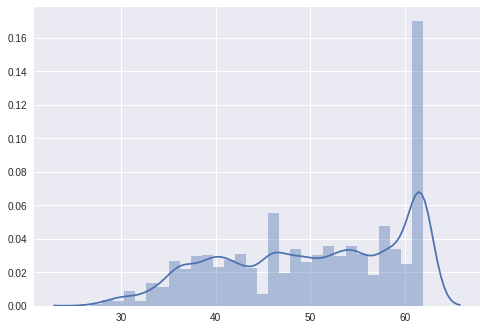

In [0]:
dp = df[['fuel_litre']].astype(float)
dt = dt[['fuel_litre']].astype(float)
dp = dp.append(dt, ignore_index=True)
dd = dd[['A']].astype("float32")
#dp.reset_index(drop=True, inplace=True)
dp = dp[dp.fuel_litre != 0]
sns.distplot(dp,bins=30)
dp.dtypes


***Train Test Split***

In [0]:

X_train, X_test = train_test_split( dp,test_size=0.2,shuffle = False)

#X_train.reset_index(drop=True, inplace=True)
#X_test.reset_index(drop = True , inplace = True)

#noise_train = np.random.normal(0,5,[22423,1])
#noise_train = noise_train + X_train
noise_train = X_train
#noise_test = np.random.normal(0,10,[2218,1])
#noise_test = noise_test + X_test
noise_test =  X_test
count_row_test = X_test.shape[0]
count_row_train = X_train.shape[0]


# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
#x_scaled = min_max_scaler.fit_transform(dp)

# Run the normalizer on the dataframe
#df_normalized = pd.DataFrame(x_scaled)
X_test.dtypes

fuel_litre    float64
dtype: object

In [0]:
#X_test = scipy.signal.medfilt(X_test, kernel_size=(3, 1))

In [0]:
#X_test =pd.DataFrame(X_test)  
#plt.scatter(X_test[0], X_test.index)

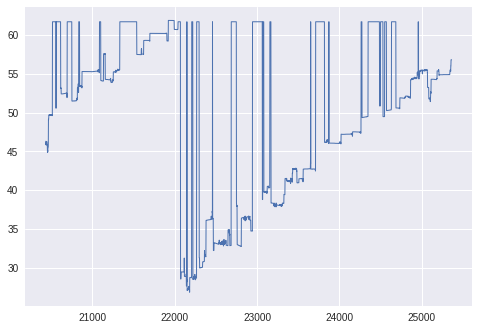

In [0]:
#dt = dp[['fuel_litre']]  
t = X_test.index
s = X_test.values
line, = plt.plot(t, s, lw=1)



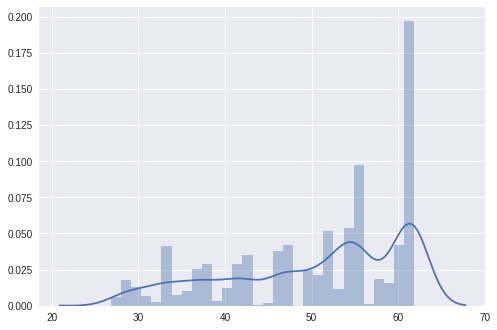

In [0]:
sns.distplot(X_test,bins=30)

***MinMaxScaler(Data Preprocessing)***

In [0]:
def  minMaxScaler(Df):
  # Create a minimum and maximum processor object
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(Df)
  df_normalized = pd.DataFrame(x_scaled)
  return df_normalized

19712

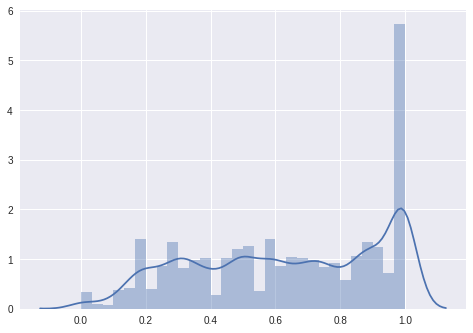

In [0]:


# Run the normalizer on the dataframe
df_normalized_train = minMaxScaler(X_train)
sns.distplot(df_normalized_train,bins=30)
df_normalized_train.shape[0]




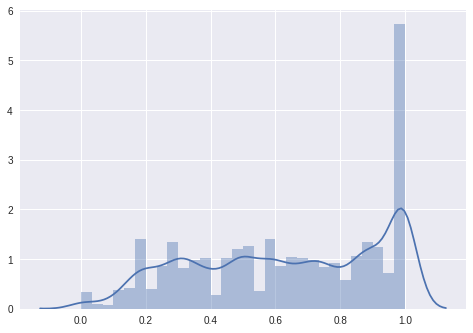

In [0]:
df_normalized_train_noise = minMaxScaler(noise_train)
sns.distplot(df_normalized_train_noise,bins=30)




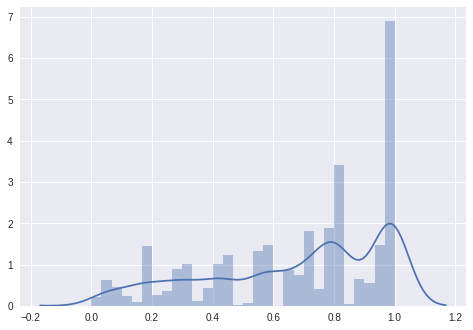

In [0]:


df_normalized_test_noise = minMaxScaler(noise_test)
sns.distplot(df_normalized_test_noise,bins=30)


In [0]:
#dd = dd[['A']]  
#dd = dd[10200:15000]
#t = dd.index
#s = dd.values
#line, = plt.plot(t, s, lw=0.5)
#D_train = minMaxScaler(dd)
X_train.shape

(19712, 1)

In [0]:

def fill_nans_scipy1(padata, pkind='nearest'):
  
  aindexes = np.arange(padata.shape[0])          
  agood_indexes = np.where(np.isfinite(padata))
  b = padata[agood_indexes[0]].squeeze()
  a = agood_indexes[0] 
  f = interp1d(a
             , b
             , bounds_error=False
             , copy=False
             , fill_value="extrapolate"
             , kind=pkind)
  return f(aindexes)

In [0]:
def filter(a,window_median,polyorder,window_golay,mode):
  
  X_med = []

  for i in range(0, a.shape[0]):
      X_med.append(a.iloc[i, 0])
  
  X_med = medfilt(X_med,window_median)
  plt.figure(1)
  plt.subplot(211)
  plt.plot(X_med, label='After inter-polation')
  X_med  = savgol_filter(X_med ,window_length=window_golay,polyorder= polyorder,mode = mode )
  plt.subplot(212)
  plt.plot(X_med, label='After inter-polation')
  X_med = pd.DataFrame(X_med)
  return X_med


Clustering

3088
3088


(4800, 1)

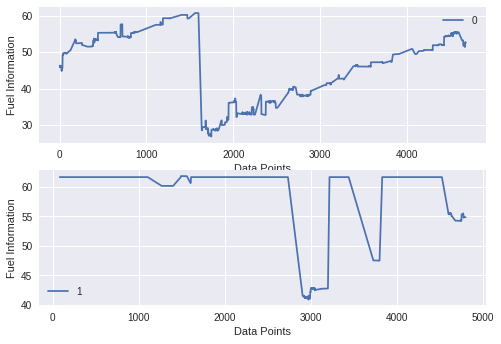

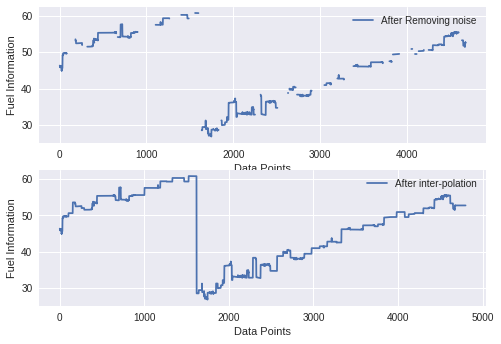

In [0]:


def Clustering(Data): 
  #Hiearchal CLustering
  ward_list = []
  label = []
  size1 = 0
  size2 = 200
  batch_size = 200
  data = []        
  count_row_test = Data.shape[0]
  num_batches =int(round(count_row_test/batch_size)) 
  for x in range(num_batches-1):
    
    batch2 = Data.iloc[size1:size2]
    batch_noise = batch2.values.reshape(batch_size,1)
    #print("Compute unstructured hierarchical clustering...")
    st = time.time()
    ward = AgglomerativeClustering(n_clusters=2, linkage='single').fit(batch_noise)
    ward_list.append(ward)
    elapsed_time = time.time() - st
    data.append(batch2.values)
    label.append(ward.labels_)
    #print("Elapsed time: %.2fs" % elapsed_time)
    size1 = size1+200
    size2 = size2+200

  #creating dataset
  label1 = np.concatenate(np.array( label))
  data1 =np.concatenate(np.array( data))
  db = pd.DataFrame({ 'labels':label1})
  db = db.assign(data = data1)
  da = db['labels'] == 0
  dc = db['labels'] == 1


  da = db[da]
  dc = db[dc]

  #sns.distplot(da['data'],bins=30)
  
  #visualization
  plt.figure(1)
  plt.subplot(211) 
  plt.plot(da['data'], label='0')
  plt.xlabel("Data Points")
  plt.ylabel("Fuel Information")
  plt.legend()
  plt.subplot(212) 
  plt.plot(dc['data'], label='1')
  plt.xlabel("Data Points")
  plt.ylabel("Fuel Information")
  plt.legend()
  
  #removing noise
  da = db['labels'] == 0
  dc = db['labels'] == 1
  #dm = db.copy(deep=True)
  #dm = dm[da]
  #dm = dm.iloc[:,1]
  #x = dm.mean()
  #print(x)
  dm = db.copy(deep=True)
  dm[dc] = None
  d_test_noise = dm.iloc[:,1]
  d_test_noise = pd.DataFrame(d_test_noise)
  
  #visualization
  plt.figure(2)
  plt.subplot(211)
  plt.plot(d_test_noise, label='After Removing noise')
  plt.xlabel("Data Points")
  plt.ylabel("Fuel Information")
  plt.legend()
  
  #Getting Indexes for interpolation
  a = dm[dc].index.astype(int).values


  #plt.plot(d_test_noise, label='0')
  #d_test_noise = pd.DataFrame(d_test_noise)

  #d_test_noise_norm = minMaxScaler(d_test_noise)
  #sns.distplot(d_test_noise_norm,bins=30)
  #plt.plot(a, label='0')
  d_test_noise = d_test_noise.values

  a =np.where(np.isfinite(d_test_noise))
  print(len(a[0]))
  a = d_test_noise[a[0]]
  print(len(a))
  
  #interpolation
  New_test_data = fill_nans_scipy1(d_test_noise)
  New_test_data = pd.DataFrame(New_test_data)
  plt.subplot(212)
  plt.plot(New_test_data, label='After inter-polation')
  plt.xlabel("Data Points")
  plt.ylabel("Fuel Information")
  plt.legend()
  return New_test_data

S = Clustering(X_test)
S.shape

In [0]:


# def Masking(Sa):
  
#   S1 = Sa.loc[Sa[0]>60].index
#   Last = 0
#   First = 0
#   D = []
#   for x in range(len(S1)):
#      if(Sa.iat[S1[x]-1,0]<58):
#         First = S1[x]
#         print(First)
#      elif(Sa.iat[S1[x],0]<Sa.iat[S1[x]+1,0]):
#         D.append(S1[x])
   
        
#   Last  = D[0]   
#   print(Last)
#   print(Last)   
#   if(Last !=0 and First !=0):
#     Sa.iloc[First:Last] = None
#     return Sa
#   else:
#     return Sa

(4800, 1)

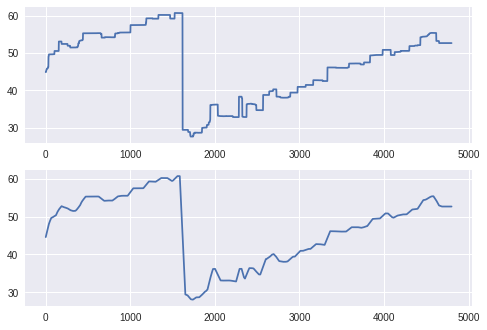

In [0]:
S1 = filter(S,window_median = 65 ,polyorder = 1,window_golay = 65,mode = "interp")

S1.shape

In [0]:
d_test_noise_norm = minMaxScaler(S1)

14555
14555


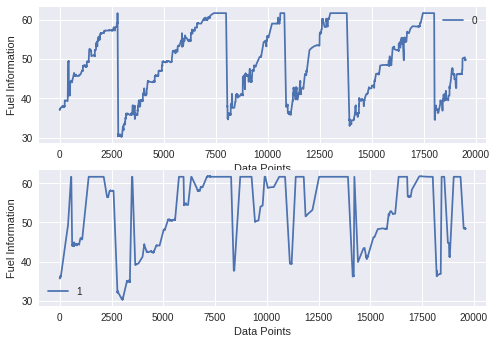

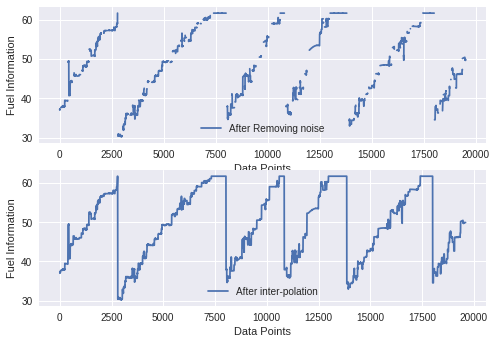

In [0]:
D = Clustering(X_train)




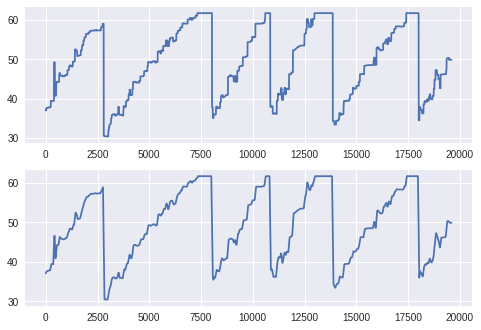

In [0]:
D1 = filter(D,window_median = 65 ,polyorder = 1,window_golay = 65,mode = "interp")

In [0]:
D2 = minMaxScaler(D)
D3 = minMaxScaler(D1)

***Data Preprocessing Part 2***

,0
0,0.149660
1,0.149964
2,0.150267
3,0.150571
4,0.150875


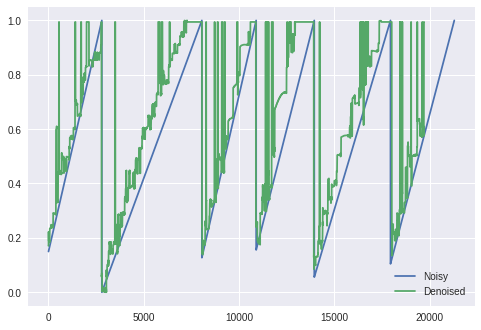

In [0]:


t1 = np.linspace(0, .98, 4000)
t2 = np.linspace(0, .79, 3350)
t3 = np.linspace(0, .85, 4000)
t4 = np.linspace(0, .76,3050)
t5 = np.linspace(0, .77, 2850)
t6 = np.linspace(0, .9, 5250)
t7 = np.linspace(0, .75, 2800)
dk = 1 - np.concatenate(
    [signal.sawtooth(2 * np.pi *t2),signal.sawtooth(2 * np.pi *t3*.98),signal.sawtooth(2 * np.pi *t4*.98),
    signal.sawtooth(2 * np.pi *t5),signal.sawtooth(2 * np.pi *t6*.98),signal.sawtooth(2 * np.pi *t7)]
)
dk = dk[::-1]
dk = pd.DataFrame(dk)
dk = minMaxScaler(dk)
#df_normalized_train =  minMaxScaler(D2)


plt.plot(dk, label='Noisy')
plt.plot( df_normalized_train , label ='Denoised')
plt.legend()
dk.head()


,0
count,21300.000000
mean,47.423479
std,8.415319
min,30.260799
25%,40.283786
50%,47.482020
75%,54.679579
max,61.874433


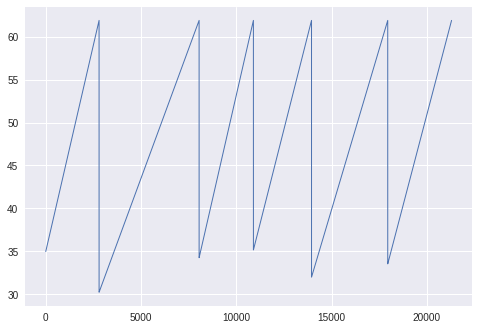

In [0]:
min_max_scaler.fit(X_train)
data5 = min_max_scaler.inverse_transform(dk)
data5 = pd.DataFrame(data5)
data5.to_csv('/content/drive/My Drive/Machine_Learning/CSE499VTS/Labels.csv',index = False)
data5 = data5[[0]]  
t = data5.index
s = data5.values
line, = plt.plot(t, s, lw=1)
data5.describe()

In [0]:
def evaluate(model,non_scaled_test,scaled_test,timestamp,batch_size):
   
  min_max_scaler.fit(non_scaled_test)

  inputs = []
  for i in range(timestamp, scaled_test.shape[0]-6):
      inputs.append( scaled_test.iloc[i-timestamp:i, 0])
  inputs = np.array(inputs)
  inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
  predict = model.predict(inputs,batch_size)
  predict1 = min_max_scaler.inverse_transform(predict)
  rmse = math.sqrt(mean_squared_error(non_scaled_test[250:-6], predict1))
  return rmse

In [0]:
def LSTM_Fit_predict(X_tobe_trained,test_tobe_predicted_unscaled,test_tobe_predicted_scaled,nb_epoch,batch_size,timestamp):
  
  X_train1 = []
  y_train1 = []
  for i in range(timestamp, 19600-100):
      X_train1.append(X_tobe_trained.iloc[i-timestamp:i, 0])
      y_train1.append(X_tobe_trained.iloc[i+50, 0])
  X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
  X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
 
  regressor = Sequential()
  regressor.add(LSTM(units = 3, return_sequences = True, batch_input_shape = (batch_size, X_train1.shape[1],X_train1.shape[2]),recurrent_dropout= 0.3))

  # Adding a second LSTM layer
  regressor.add(LSTM(units = 3, return_sequences = True))

  # Adding a third LSTM layer
  regressor.add(LSTM(units = 3, return_sequences = True))

  # Adding a fourth LSTM layer
  regressor.add(LSTM(units = 3))

  # Adding the output layer
  regressor.add(Dense(units = 1))

  
  regressor.compile(optimizer =tf.train.RMSPropOptimizer(learning_rate=0.002),loss = "mean_squared_error")
  TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  tf.logging.set_verbosity(tf.logging.INFO)
  regressor = tf.contrib.tpu.keras_to_tpu_model(regressor,strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))
  
  test_rmse = list()
  for i in range(nb_epoch):
    print("epoch: ",i)
    regressor.fit(X_train1,y_train1,epochs=1,batch_size = batch_size ,shuffle = False)

    test_rmse.append(evaluate(regressor, test_tobe_predicted_unscaled ,test_tobe_predicted_scaled, timestamp,batch_size))

    history = pd.DataFrame()
    history['test'] = test_rmse 

  return history,regressor

In [0]:
def predict(model,non_scaled_pre,scaled_pre,timestamp,batch_size):
  
  min_max_scaler.fit(non_scaled_pre)
  
  inputs = []
  for i in range(timestamp, scaled_pre.shape[0]-4):
      inputs.append( scaled_pre.iloc[i-timestamp:i, 0])
  inputs = np.array(inputs)
  inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
  predict = model.predict(inputs,batch_size)
  predict1 = min_max_scaler.inverse_transform(predict)
  non_scaled = non_scaled_pre[0:-64] 
  plt.plot(non_scaled, label='Noisy')
  plt.plot(predict1, label='Denoised')
  plt.xlabel("datapoints")
  plt.ylabel("Fuel Information")
  plt.legend()
  
  

In [0]:
def model_loss_accuracy(model):
  # summarize history for loss
  plt.plot(model.history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

In [0]:
Train = D3
#Label = D3
Test_non_scaled = S1
Test_scaled = minMaxScaler(S1)
#plt.plot(D1, color='orange')

INFO:tensorflow:Querying Tensorflow master (b'grpc://10.93.21.154:8470') for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 5786556808809623518)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 5890753056519832524)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 3757563009999053199)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 11921924322943773279)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 12529917127510635778)
INFO:tensorflow:*** Available Device: _Device

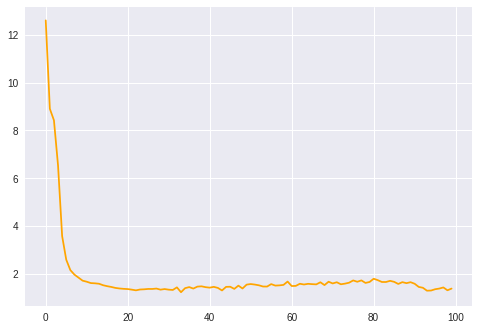

In [0]:

n_batch = 64*8
n_epochs = 100
timestamp = 250
#for i in range(repeats):
history,model = LSTM_Fit_predict( Train, Test_non_scaled,Test_scaled, n_epochs, n_batch,timestamp)
		#pyplot.plot(history['train'], color='blue')
plt.plot(history['test'], color='orange')
		#print('%d), TestRMSE=%f' % (i, history['test'].iloc[-1]))
plt.savefig('/content/drive/My Drive/Machine_Learning/CSE499VTS/epochs_diagnostic.png')

  

In [0]:
def make_model(batch_size = None):
  regressor = Sequential()
  regressor.add(LSTM(units = 3, return_sequences = True, input_shape = (None,1)))

  # Adding a second LSTM layer
  regressor.add(LSTM(units = 3, return_sequences = True))

  # Adding a third LSTM layer
  regressor.add(LSTM(units = 3, return_sequences = True))

  # Adding a fourth LSTM layer
  regressor.add(LSTM(units = 3))

  # Adding the output layer
  regressor.add(Dense(units = 1))

  
  regressor.compile(optimizer ="RMSprop" ,loss= "mean_squared_error")
  
  return regressor

In [0]:
model.save_weights("/content/drive/My Drive/Machine_Learning/CSE499VTS/tpu_model-predict1.h5",overwrite = True)


INFO:tensorflow:Copying TPU weights to the CPU


In [0]:
inferencing_model = make_model(batch_size=None)
inferencing_model.load_weights('/content/drive/My Drive/Machine_Learning/CSE499VTS/tpu_model-predict1.h5')
inferencing_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 3)           60        
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 3)           84        
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 3)           84        
_________________________________________________________________
lstm_7 (LSTM)                (None, 3)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 316
Trainable params: 316
Non-trainable params: 0
_________________________________________________________________


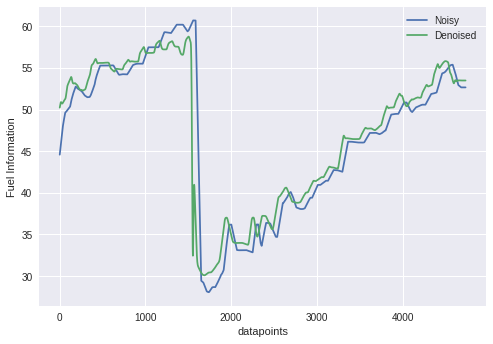

In [0]:
predict(inferencing_model,Test_non_scaled,Test_scaled,60,64*8)

In [0]:
model_json = model.to_json()
with open("/content/drive/My Drive/Machine_Learning/CSE499VTS/model.json","w")as json_file:
  json_file.write(model_json)
model.save_weights("/content/drive/My Drive/Machine_Learning/CSE499VTS/model1.h5")
print("model saved")

TypeError: ignored

In [0]:
json_file = open("/content/drive/My Drive/Machine_Learning/CSE499VTS/model.json",'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/My Drive/Machine_Learning/CSE499VTS/model.h5")
print("loaded model from disk")

***Inputs and outputs***

In [0]:
#Y_train_real = dk.iloc[0:19712:,0:1].values
#X_train_real = df_normalized_train.iloc[:,0:1].values

X_train1 = []
y_train1 = []
for i in range(60, 19500):
    X_train1.append(df_normalized_train_noise.iloc[i-60:i, 0])
    y_train1.append(d_train_noise_norm.iloc[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)




In [0]:
X_train1.shape

***Reshaping***

In [0]:
#X_train_real = np.reshape(X_train_real,(19712,1,1))
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))

***RNN***

In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 3, return_sequences = True, input_shape = (None, 1)))

# Adding a second LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a third LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 3))

# Adding the output layer
regressor.add(Dense(units = 1))


***Compile***

In [0]:
regressor.compile(optimizer = "RMSprop",loss = "mean_squared_error")

***fitting***

In [0]:
regressor.fit(X_train1,y_train1,batch_size = 10,epochs = 20)

***Result and visualization***

In [0]:
min_max_scaler.fit(S)
inputs = []
for i in range(60, 4800):
  inputs.append( d_test_noise_norm.iloc[i-60:i, 0])    
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predict = regressor.predict(inputs,batch_size = 150)
predict1 = min_max_scaler.inverse_transform(predict)

***Prediction***

In [0]:
plt.plot(S2, label='Noisy')
plt.plot(predict1, label='Denoised')
plt.xlabel("datapoints")
plt.ylabel("Fuel Information")
plt.legend()
           


***Evaluating***

In [0]:


# rmse = math.sqrt(mean_squared_error(New_test_data,predict1))
# accuracy = (rmse/4800)*100
# print(accuracy)

In [0]:
# model_json = regressor.to_json()
# with open("/content/drive/My Drive/Machine_Learning/CSE499VTS/model.json","w")as json_file:
#   json_file.write(model_json)
# regressor.save_weights("model.h5")
# print("model saved")
  

***Save model***

In [0]:
# json_file = open("/content/drive/My Drive/Machine_Learning/CSE499VTS/model.json",'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# loaded_model.load_weights("model.h5")
# print("loaded model from disk")


In [0]:
# loaded_model.compile(optimizer = "RMSprop",loss = "mean_squared_error")

In [0]:
# score = loaded_model.evaluate(inputs,predict1,verbose = 0 )
# print(score)

In [0]:
new_samples=[]